### 0. Preprocessing

#### 0.1. Load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
print(df.columns)

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


#### 0.2. Check the dataset if it contain NANs

In [4]:
pd.isna(df).any()

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

- Mean no invalid value was found in the dataframe

#### 0.3. Convert string datatype variables into numberic datatype

In [5]:
# Processing the month variable
m_values, m_indexes = pd.factorize(df.iloc[:, 2]) # 2 is the index of the 'month' column
df.iloc[:, 2] = m_values

df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,0,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,1,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,1,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,0,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,0,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
# Processing the day variable
d_values, d_indexes = pd.factorize(df.iloc[:, 3]) # 3 is the index of the 'day' column
df.iloc[:, 3] = d_values

df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,0,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,1,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,1,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,0,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,0,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


#### 0.4. Convert to float datatype

In [7]:
print(df.dtypes)

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


- Convert the `X`, `Y`, `month`, `day`, `RH` features into float

In [8]:
features_to_convert = ['X', 'Y', 'month', 'day', 'RH']

for feature in features_to_convert:
    df[feature] = df[feature].astype('float')

df.dtypes

X        float64
Y        float64
month    float64
day      float64
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH       float64
wind     float64
rain     float64
area     float64
dtype: object

#### 0.4. Split the dataset

In [9]:
def train_test_split(df: pd.DataFrame, split=0.8, random_state=None):
    # Random for train
    train = df.sample(frac=split, random_state=random_state)

    # Create X and Y for train set
    y_train = train['area']
    X_train = train.drop('area', axis=1)

    # Remainder for test
    test = df.drop(train.index)

    # Create X and y for test set
    y_test = test['area']
    X_test = test.drop('area', axis=1)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(df, random_state=1)

In [10]:
X_train.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
270,2.0,2.0,2.0,1.0,92.1,152.6,658.2,14.3,21.8,56.0,3.1,0.0
90,6.0,5.0,2.0,2.0,90.2,96.9,624.2,8.9,14.7,59.0,5.8,0.0
133,4.0,6.0,3.0,6.0,93.7,80.9,685.2,17.9,17.6,42.0,3.1,0.0
221,3.0,4.0,3.0,0.0,93.3,141.2,713.9,13.9,18.6,49.0,3.6,0.0
224,7.0,4.0,3.0,5.0,90.1,82.9,735.7,6.2,15.4,57.0,4.5,0.0


In [11]:
print(f"There are {len(X_train)} samples in the train set, and {len(X_test)} samples in the test set.")

There are 414 samples in the train set, and 103 samples in the test set.


#### 0.5. Evaluation metric

- RMSE (sometimes called Mean Squared Error (MSE) - dropping the Root part from the calculating and the name). RMSE is calculated as the square root of the mean of the squared differences between actual outcomes and predictions. 
- Squaring each error forces the values to be positive, and the square root of the mean squared error returns the error metric back to the original units for comparision.

$$
RMSE = \sqrt{\frac{\sum_{i=1}^{n}(predicted_i - actual_i)^2}{total \ predictions}}
$$

In [12]:
from math import sqrt

def rmse_metric(actual, predicted):
    sum_error = 0.0

    for i, label in enumerate(actual):
        prediction_error = predicted[i] - actual[i]
        sum_error += prediction_error ** 2
    
    rmse = sum_error / float(len(actual))
    
    return sqrt(rmse)

### Assignment 1 (3 scores):

- Use the Numpy library only to construct the Linear Regression model.
- Train and Evaluate that Linear Regression model on the [Forest Fires](https://archive.ics.uci.edu/static/public/162/forest+fires.zip) dataset.

We have:
$$
    y = X\beta + \varepsilon = \sum_{i=1}^D \beta_i x_i + \varepsilon
$$

The estimator for this linear regression model having the form

$$
    \hat{\beta} = (X^TX)^{-1} X^Ty
$$

In [13]:
def OLS(X_train, y_train, X_test):
    coefficients = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

    y_pred = X_test.to_numpy() @ coefficients

    return y_pred

y_pred = OLS(X_train, y_train, X_test)

In [14]:
print("RMSE:", rmse_metric(y_test.to_list(), y_pred))

RMSE: 40.42210834448839


### Assignment 2 (3 scores):

- Standardize the data so that their mean is $0$ and their variance is $1$.
- Compare the results of Linear Regression model when being trained on the original and standardized data.

#### 2.1. Standardize the data, and save into the `standardized_data` DataFrame

In [ ]:
standardized_data = df.copy()

continuous_cols = ['FFMC', 'DMC', 'ISI', 'temp', 'wind'] # only use for continuous datatype

def standarize_data(column):
    std = column.std(ddof=1)

    if std == 0 or pd.isna(std):
        return column - column.mean()
    
    return (column - column.mean()) / std

for col in continuous_cols:
    standardized_data[col] = standarize_data(standardized_data[col])

X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(standardized_data, random_state=1)

In [16]:
X_train_std.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
270,2.0,2.0,2.0,1.0,0.263639,0.651521,658.2,1.157663,0.501295,56.0,-0.512154,0.0
90,6.0,5.0,2.0,2.0,-0.080557,-0.218159,624.2,-0.026684,-0.721446,59.0,0.994835,0.0
133,4.0,6.0,3.0,6.0,0.553489,-0.467978,685.2,1.947227,-0.222017,42.0,-0.512154,0.0
221,3.0,4.0,3.0,0.0,0.481026,0.473526,713.9,1.069933,-0.049800,49.0,-0.233082,0.0
224,7.0,4.0,3.0,5.0,-0.098672,-0.436751,735.7,-0.618857,-0.600894,57.0,0.269248,0.0


#### 2.2. Train and evaluate on the standardized dataset (`standardized_data`)

In [29]:
y_pred_std = OLS(X_train_std, y_train_std, X_test_std)

print("RMSE:", rmse_metric(y_test_std.to_list(), y_pred_std))

RMSE: 40.25553481028807


#### 2.3. Commpare the result

- With the original dataset (without standardized), the RMSE value is $40.42$. 
- And with the standardized dataset, the RMSE value is decreased to $40.25$, which is slightly improved (~$0.17$ RMSE).

#### Data normalization

The OLS estimator of a linear regression model has the form

$$
    \hat{\beta} = (X^T X)^{-1} X^T y
$$
where $X^T X \in \mathbb{R}^{K \times K}$ is called the normal matrix of the **Gram Matrix**.

Considering the convariance of $X$, we have

\begin{align}
    Cov(X)  & = \mathbb{E}[(X - \mathbb{E}[X])^2] \\
            & = \mathbb{E}[X^T X - 2 X^T\mathbb{E}[X] + \mathbb{E}[X]^T \mathbb{E}[X]] \\
            & = \mathbb{E}[X^T X] - 2 \mathbb{E}[X^T\mathbb{E}[X]] + \mathbb{E}[X]^T \mathbb{E}[X] \\
            & = \mathbb{E}[X^T X] - 2 \mathbb{E}[X]^T\mathbb{E}[X] + \mathbb{E}[X]^T \mathbb{E}[X] \\
            & = \mathbb{E}[X^T X] - \mathbb{E}[X]^T \mathbb{E}[X] \\
\end{align}

In case we have $\mathbb{E}[X] = 0$, then $X^T X = Cov(X)$. The normalization helps we to have the numerical stability of the input, theoretically leads to stable calculation when being applied to unseen data.

### Assignment 3 (2 scores):

- Perform feature engineering to remove columns that are linearly dependent (colinear) with other columns in the dataset.
- Evaluate the Linear Regression model when beeing trained on the original data and preprocessed data.

#### Using Correlation Matrix

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

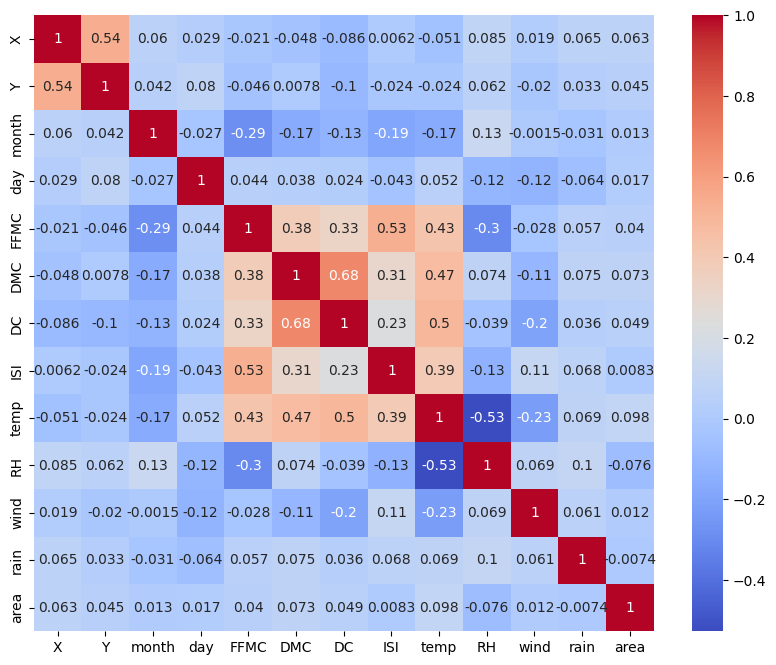

In [20]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

- We can see that the `DMC` and `DC` columns has `corr=0.68`, which is slightly high (as this is the highest correlation value in our dataset, then we can try to delete one of the column (I choose `DC`) to see the training result before and after deleting)

In [21]:
# Delete DC column
dl_df = df.drop('DC', axis=1) # deleted dataframe

In [22]:
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(dl_df, random_state=1)

X_train_dl.head()

,X,Y,month,day,FFMC,DMC,ISI,temp,RH,wind,rain
270,2.0,2.0,2.0,1.0,92.1,152.6,14.3,21.8,56.0,3.1,0.0
90,6.0,5.0,2.0,2.0,90.2,96.9,8.9,14.7,59.0,5.8,0.0
133,4.0,6.0,3.0,6.0,93.7,80.9,17.9,17.6,42.0,3.1,0.0
221,3.0,4.0,3.0,0.0,93.3,141.2,13.9,18.6,49.0,3.6,0.0
224,7.0,4.0,3.0,5.0,90.1,82.9,6.2,15.4,57.0,4.5,0.0


In [23]:
y_pred_dl = OLS(X_train_dl, y_train_dl, X_test_dl)

print("RMSE:", rmse_metric(y_test_dl.to_list(), y_pred_dl))

RMSE: 40.42609290960553


- The result on the original data is `RMSE = 40.42`, while the result on the processed data is `RMSE = 78.83`, which is significantly rised in RMSE, means the deleting of the column `DC` tends to make the model worse. 
- Because the correlation value is not too big (only 0.68), it is not too linear dependent. 
- We should only delete one feature if we can find two features have correlation $\approx$ 1

#### On the Problem of Colinearity

As stated previously, the OLS of the linear regression model is achieved by assuming that $rank(X) = K$ or $det(X) \ne 0$. So that removing columns in $X$ having colinearity with other columns is to ensure that assumption of the full rank condition of $X$. In the case $det(X) = 0$, then the **Moore-Penrose inverse** will be applied to determine the pseudo-inverse matrix of $X^T X$.

### Assignment 4 (2 scores):

- Implement the Linear Regression model using Machine Learning libraries (Scikit Learn or SKorch).
- Compare the results of Linear Regression model constructed manually and from Machine Learning libraries.

#### 4.1. Implement using Scikit Learn

In [24]:
from sklearn.linear_model import LinearRegression

# Initiate the Linear Regression model and fit to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred_sl = model.predict(X_test)

In [25]:
print("RMSE (with the implemented function):", rmse_metric(y_test.to_list(), y_pred_sl))

RMSE (with the implemented function): 40.417681473064334


In [26]:
from sklearn.metrics import root_mean_squared_error

print("RMSE (with the Sklearn in-built function):", root_mean_squared_error(y_test, y_pred_sl)) # Same result as above

RMSE (with the Sklearn in-built function): 40.41768147306433


#### 4.2. Compare the result
- Numpy implement

In [27]:
print("RMSE:", rmse_metric(y_test.to_list(), y_pred))

RMSE: 40.42210834448839


- Scikit-Learn implement

In [28]:
print("RMSE:", rmse_metric(y_test.to_list(), y_pred_sl))

RMSE: 40.417681473064334


- We can see that the RMSE value of Numpy implemente method is 40.42, while the RMSE value of Scikit-Learn implement method is 40.41, which is almost the same.